In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Merchant Segmentation.csv')

In [3]:
df.head()

,merchant_id,total_transaction_volume,avg_transaction_size,transaction_frequency,avg_monthly_transactions,payment_method_diversity,success_rate,merchant_age_days
0,m_000f075d63,494575.0,49457.500000,10,5.000000,3,1.000000,675
1,m_01b846e000,656846.0,43789.733333,15,7.500000,3,1.000000,697
2,m_01e9a0b208,1093271.0,37699.000000,29,9.666667,3,1.000000,725
3,m_02f4599a40,19764768.0,40254.109979,491,49.100000,3,0.997963,728
4,m_03a6e19aa3,342019.0,48859.857142,7,3.500000,3,1.000000,691


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   merchant_id               340 non-null    object 
 1   total_transaction_volume  340 non-null    float64
 2   avg_transaction_size      340 non-null    float64
 3   transaction_frequency     340 non-null    int64  
 4   avg_monthly_transactions  315 non-null    float64
 5   payment_method_diversity  340 non-null    int64  
 6   success_rate              340 non-null    float64
 7   merchant_age_days         340 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 21.4+ KB


In [11]:
df['avg_monthly_transactions'] = df['avg_monthly_transactions'].fillna(df['avg_monthly_transactions'].median())

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   merchant_id               340 non-null    object 
 1   total_transaction_volume  340 non-null    float64
 2   avg_transaction_size      340 non-null    float64
 3   transaction_frequency     340 non-null    int64  
 4   avg_monthly_transactions  340 non-null    float64
 5   payment_method_diversity  340 non-null    int64  
 6   success_rate              340 non-null    float64
 7   merchant_age_days         340 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 21.4+ KB


In [13]:
X = df.drop('merchant_id', axis=1)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
from sklearn.cluster import KMeans

In [ ]:
inertia = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

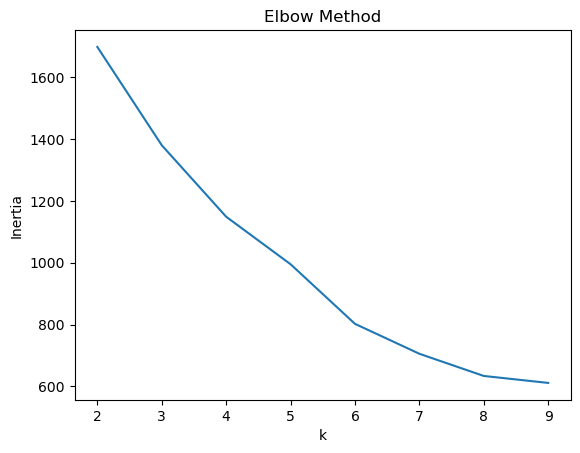

In [18]:
plt.plot(range(2,10), inertia)
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.savefig('Kmeans_Graph.png', dpi=300, bbox_inches='tight')
plt.show()

In [19]:
kmeans = KMeans(n_clusters=3, random_state=42)
X['Cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\CoreTech\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [20]:
summary = X.groupby('Cluster').agg({
    'total_transaction_volume': 'mean',
    'avg_transaction_size': 'mean',
    'transaction_frequency': 'mean',
    'avg_monthly_transactions': 'mean',
    'payment_method_diversity': 'mean',
    'success_rate': 'mean',
    'merchant_age_days': 'mean',
}).round(2)
print(summary)

         total_transaction_volume  avg_transaction_size  \
Cluster                                                   
0                      1391359.05              40707.44   
1                       132083.71              43599.82   
2                      8270123.41              40952.32   

         transaction_frequency  avg_monthly_transactions  \
Cluster                                                    
0                        34.29                     10.27   
1                         3.22                      5.00   
2                       201.72                     40.29   

         payment_method_diversity  success_rate  merchant_age_days  
Cluster                                                             
0                            3.00          1.00             701.49  
1                            1.62          0.99             702.00  
2                            3.00          1.00             699.04  


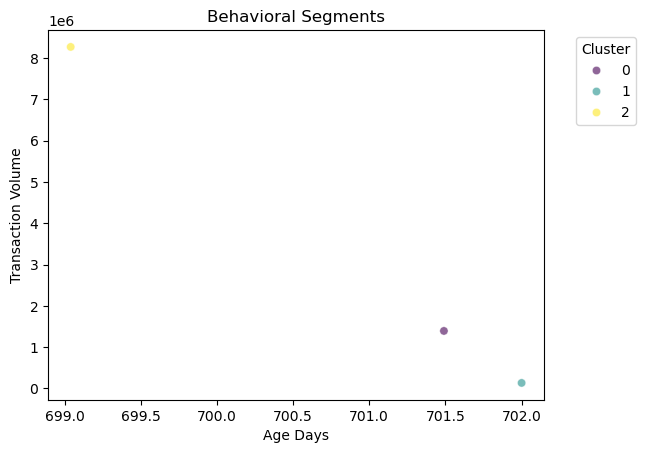

In [22]:
# Scatter plot: Total Transaction Volume vs Merchant Age Days
sns.scatterplot(
    data=summary,
    x='merchant_age_days',
    y='total_transaction_volume',
    hue='Cluster',
    palette='viridis',
    alpha=0.6
)
plt.title('Behavioral Segments')
plt.xlabel('Age Days')
plt.ylabel('Transaction Volume')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('behavioral_segments.png', dpi=300, bbox_inches='tight')
plt.show()

In [23]:
summary = summary.reset_index()   # adds 'Cluster' as a column
cluster_names = {
    0: 'Growing Merchants',
    1: 'Dormant Merchants',
    2: 'Power Merchants'
}
summary['Segment_Name'] = summary['Cluster'].map(cluster_names)

In [24]:
print(summary)

   Cluster  total_transaction_volume  avg_transaction_size  \
0        0                1391359.05              40707.44   
1        1                 132083.71              43599.82   
2        2                8270123.41              40952.32   

   transaction_frequency  avg_monthly_transactions  payment_method_diversity  \
0                  34.29                     10.27                      3.00   
1                   3.22                      5.00                      1.62   
2                 201.72                     40.29                      3.00   

   success_rate  merchant_age_days       Segment_Name  
0          1.00             701.49  Growing Merchants  
1          0.99             702.00  Dormant Merchants  
2          1.00             699.04    Power Merchants  


In [28]:
df['Cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\CoreTech\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [29]:
summary = X.groupby('Cluster').agg({
    'total_transaction_volume': 'mean',
    'avg_transaction_size': 'mean',
    'transaction_frequency': 'mean',
    'avg_monthly_transactions': 'mean',
    'payment_method_diversity': 'mean',
    'success_rate': 'mean',
    'merchant_age_days': 'mean',
}).round(2)
print(summary)

         total_transaction_volume  avg_transaction_size  \
Cluster                                                   
0                      1391359.05              40707.44   
1                       132083.71              43599.82   
2                      8270123.41              40952.32   

         transaction_frequency  avg_monthly_transactions  \
Cluster                                                    
0                        34.29                     10.27   
1                         3.22                      5.00   
2                       201.72                     40.29   

         payment_method_diversity  success_rate  merchant_age_days  
Cluster                                                             
0                            3.00          1.00             701.49  
1                            1.62          0.99             702.00  
2                            3.00          1.00             699.04  


In [43]:
df.head()

,index,merchant_id,total_transaction_volume,avg_transaction_size,transaction_frequency,avg_monthly_transactions,payment_method_diversity,success_rate,merchant_age_days,Cluster,Segment_Name
0,0,m_000f075d63,494575.0,49457.500000,10,5.000000,3,1.000000,675,0,Growing Merchants
1,1,m_01b846e000,656846.0,43789.733333,15,7.500000,3,1.000000,697,0,Growing Merchants
2,2,m_01e9a0b208,1093271.0,37699.000000,29,9.666667,3,1.000000,725,0,Growing Merchants
3,3,m_02f4599a40,19764768.0,40254.109979,491,49.100000,3,0.997963,728,2,Power Merchants
4,4,m_03a6e19aa3,342019.0,48859.857142,7,3.500000,3,1.000000,691,0,Growing Merchants


In [42]:
df = df.reset_index()   # adds 'Cluster' as a column
cluster_names = {
    0: 'Growing Merchants',
    1: 'Dormant Merchants',
    2: 'Power Merchants'
}
df['Segment_Name'] = df['Cluster'].map(cluster_names)

In [44]:
df.to_csv('merchants_with_segments.csv', index=False)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     340 non-null    int64  
 1   merchant_id               340 non-null    object 
 2   total_transaction_volume  340 non-null    float64
 3   avg_transaction_size      340 non-null    float64
 4   transaction_frequency     340 non-null    int64  
 5   avg_monthly_transactions  340 non-null    float64
 6   payment_method_diversity  340 non-null    int64  
 7   success_rate              340 non-null    float64
 8   merchant_age_days         340 non-null    int64  
 9   Cluster                   340 non-null    int32  
 10  Segment_Name              340 non-null    object 
dtypes: float64(4), int32(1), int64(4), object(2)
memory usage: 28.0+ KB


In [47]:
df['Segment_Name'].value_counts()

Segment_Name
Growing Merchants    249
Power Merchants       46
Dormant Merchants     45
Name: count, dtype: int64

In [48]:
churn_df = pd.read_csv("churn_predictions_with_risk.csv")

In [49]:
churn_df = churn_df[
    ["merchant_id", "churn_flag", "churn_probability"]
]

In [50]:
segmentation_with_churn = df.merge(
    churn_df,
    on="merchant_id",
    how="left"
)


In [52]:
segmentation_with_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     340 non-null    int64  
 1   merchant_id               340 non-null    object 
 2   total_transaction_volume  340 non-null    float64
 3   avg_transaction_size      340 non-null    float64
 4   transaction_frequency     340 non-null    int64  
 5   avg_monthly_transactions  340 non-null    float64
 6   payment_method_diversity  340 non-null    int64  
 7   success_rate              340 non-null    float64
 8   merchant_age_days         340 non-null    int64  
 9   Cluster                   340 non-null    int32  
 10  Segment_Name              340 non-null    object 
 11  churn_flag                340 non-null    int64  
 12  churn_probability         340 non-null    float64
dtypes: float64(5), int32(1), int64(5), object(2)
memory usage: 33.3+ 

In [53]:
segment_churn = (
    segmentation_with_churn
    .groupby("Segment_Name")
    .agg(
        merchants=("merchant_id", "count"),
        churned=("churn_flag", "sum"),
        avg_churn_prob=("churn_probability", "mean")
    )
)

segment_churn["churn_rate"] = (
    segment_churn["churned"] / segment_churn["merchants"]
)

segment_churn.sort_values("churn_rate", ascending=False)

,merchants,churned,avg_churn_prob,churn_rate
Segment_Name,,,,
Dormant Merchants,45,45,1.000000,1.000000
Growing Merchants,249,229,0.915927,0.919679
Power Merchants,46,34,0.656934,0.739130


In [39]:
revenue_by_cluster = (
    df_segments
    .groupby('Cluster')['total_transaction_volume']
    .sum()
    .reset_index()
)

# Percentage of total revenue
revenue_by_cluster['pct_of_total_revenue'] = (
    revenue_by_cluster['total_transaction_volume']
    / revenue_by_cluster['total_transaction_volume'].sum()
    * 100
)

print(revenue_by_cluster)

   Cluster  total_transaction_volume  pct_of_total_revenue
0        0               346448404.0             47.276196
1        1                 5943767.0              0.811084
2        2               380425677.0             51.912720


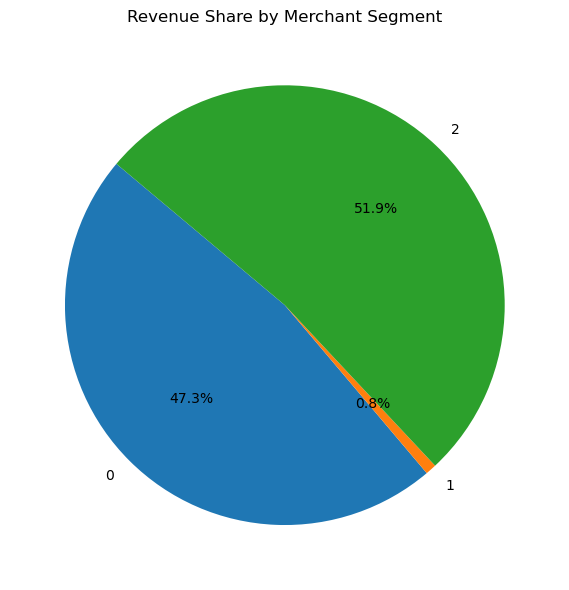

In [40]:
plt.figure(figsize=(6,6))
plt.pie(
    revenue_by_cluster['total_transaction_volume'],
    labels=revenue_by_cluster['Cluster'],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Revenue Share by Merchant Segment')
plt.tight_layout()
plt.show()

In [45]:
plt.savefig('revenue share by merchant segment.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [66]:
!jupyter nbconvert --to python Merchant_Segmentation.ipynb

[NbConvertApp] Converting notebook Merchant_Segmentation.ipynb to python
[NbConvertApp] Writing 4485 bytes to Merchant_Segmentation.py
